In [36]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# location: https://mitu.co.in/dataset
# healines.csv dataset

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [39]:
df = pd.read_csv('headlines.csv', header = None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [40]:
print(df.iloc[1,:].values[0])   #values -> gives in array form

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

In [41]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [42]:
#this function retrieves dictiory meaning of the word

def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    #print(tag)

    if tag[0][1].startswith('N'):
        pos = 'n'

    elif tag[0][1].startswith('V'):
        pos = 'v'

    elif tag[0][1].startswith('R'):
        pos = 'r'

    elif tag[0][1].startswith('J'):
        pos = 'a'

    return wnl.lemmatize(word, pos=pos)

In [43]:
lemmatize('played')

'played'

In [44]:
lemmatize('children')

'child'

In [45]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [46]:
#clean text extracted in root form to increase word frequency

def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalnum()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]
    return tokens4

In [47]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

### TF*IDF Vectorize

In [48]:
tf = TfidfVectorizer(analyzer=clean_text)

In [49]:
%%time
x_new = tf.fit_transform(df[0])
x_new

CPU times: user 1min 16s, sys: 4.11 s, total: 1min 20s
Wall time: 1min 22s


<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

In [50]:
km = KMeans(random_state=0)

In [51]:
km.fit_predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 5, 1, ..., 3, 3, 3], dtype=int32)

In [52]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [53]:
km.inertia_    #sum of squared errors

2066.5523475217014

### Elbow Method

In [54]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters = k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

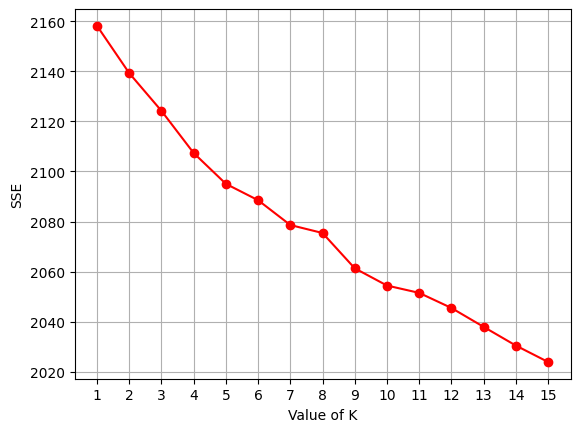

In [55]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1,16), sse, marker='o', color='r')

### Create the clusters

In [56]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

labels = km.fit_predict(x_new)
labels

array([3, 4, 3, ..., 1, 1, 1], dtype=int32)

### Seperate the clusters

In [57]:
zero = df[labels==0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [58]:
print('Cluster-0:', len(zero))
print('Cluster-1:', len(one))
print('Cluster-2:', len(two))
print('Cluster-3:', len(three))
print('Cluster-4:', len(four))

Cluster-0: 314
Cluster-1: 334
Cluster-2: 535
Cluster-3: 301
Cluster-4: 741


### Wordcloud

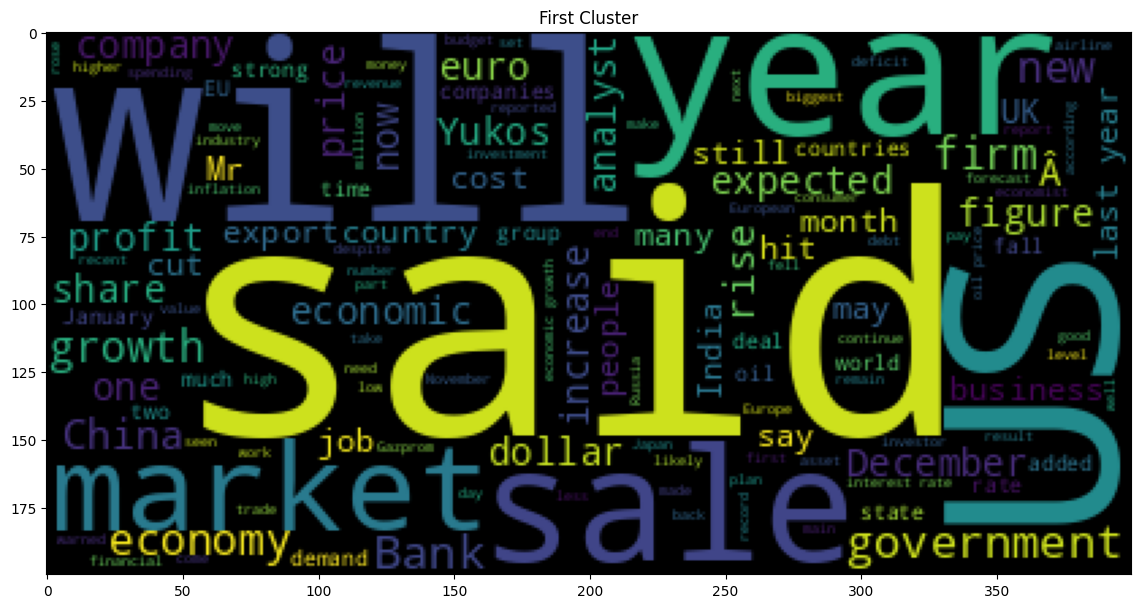

In [59]:
# 1st cluster

wc = WordCloud().generate(' '.join(one[0]))
plt.figure(figsize=(14,9))
plt.title('First Cluster')
plt.imshow(wc)

In [60]:
swords = stopwords.words('english')

new = ' '.join(one[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1132),
 ('US', 607),
 ('year', 546),
 ('growth', 355),
 ('economy', 348),
 ('market', 298),
 ('also', 292),
 ('would', 290),
 ('Mr', 279),
 ('government', 273)]

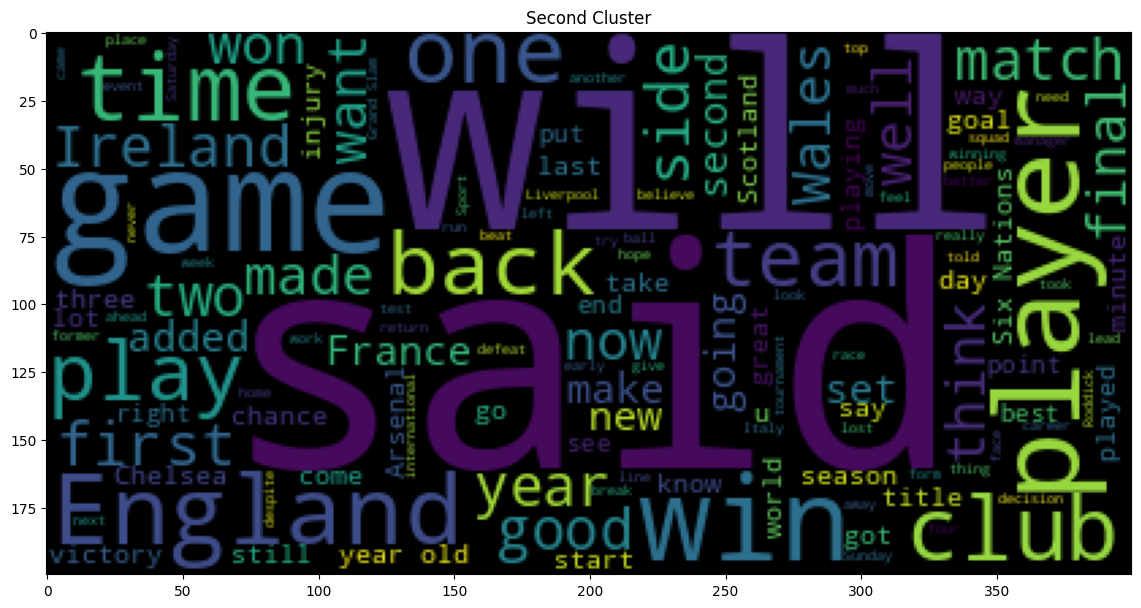

In [61]:
# 2nd cluster

wc = WordCloud().generate(' '.join(two[0]))
plt.figure(figsize=(14,9))
plt.title('Second Cluster')
plt.imshow(wc)

In [62]:
new = ' '.join(two[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 998),
 ('game', 550),
 ('England', 464),
 ('first', 442),
 ('would', 440),
 ('win', 417),
 ('last', 386),
 ('time', 366),
 ('two', 354),
 ('also', 352)]

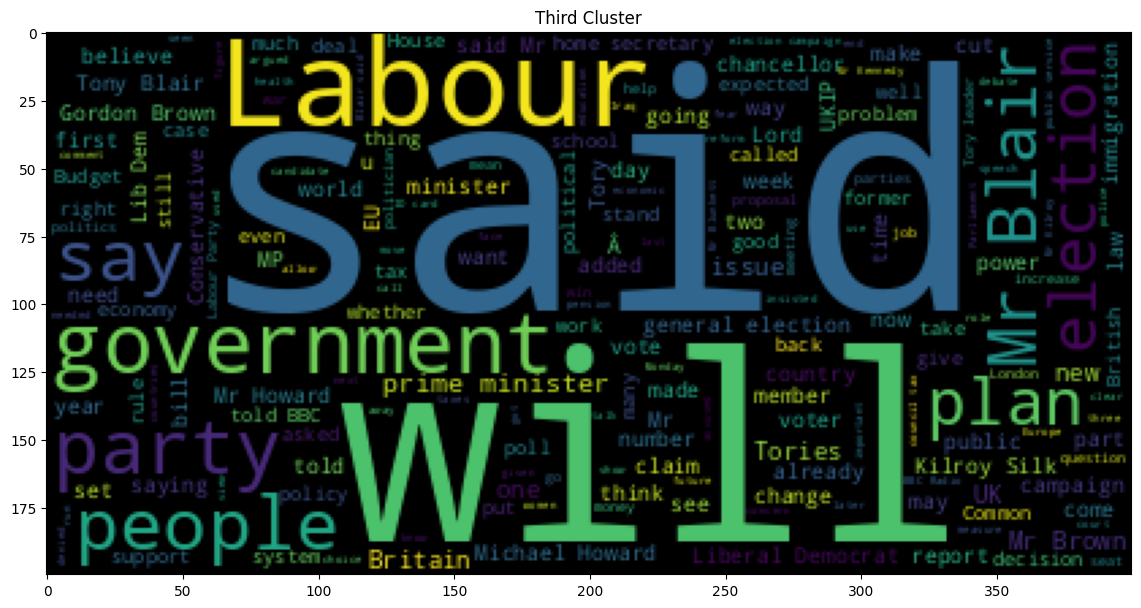

In [63]:
# 3rd cluster

wc = WordCloud().generate(' '.join(three[0]))
plt.figure(figsize=(14,9))
plt.title('Third Cluster')
plt.imshow(wc)

In [64]:
new = ' '.join(three[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('said', 1668),
 ('Mr', 1550),
 ('would', 862),
 ('Labour', 730),
 ('Blair', 563),
 ('government', 550),
 ('election', 547),
 ('people', 442),
 ('party', 413),
 ('Brown', 381)]

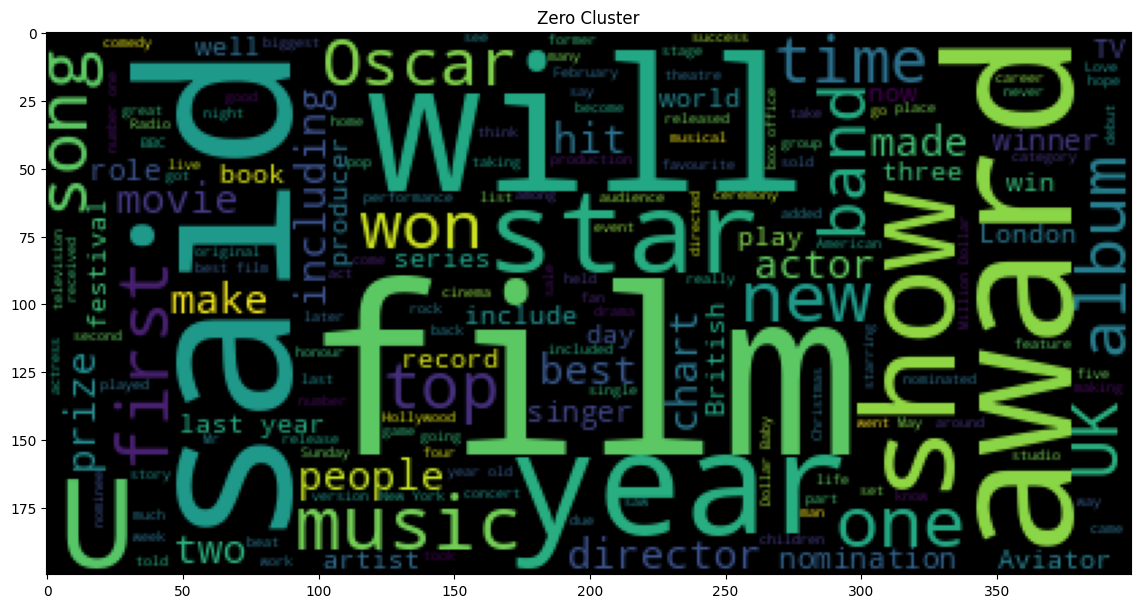

In [65]:
#Zero cluster

wc = WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(14,9))
plt.title('Zero Cluster')
plt.imshow(wc)

In [66]:
new = ' '.join(zero[0])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 652),
 ('said', 581),
 ('best', 564),
 ('also', 318),
 ('year', 312),
 ('music', 282),
 ('one', 246),
 ('US', 241),
 ('show', 223),
 ('first', 218)]